<h1>Aflevering 7</h1>
<h3>Hold CE2</h3>
Gruppe: Alexander Bjerno & Christian Winkler

In [2]:
import numpy as np
import matplotlib.pyplot as plt


<h3>(a)</h3>

En parkeringsplads på 20 m × 30 m bliver oplyst via lamper placeret forskel-
lige steder og i forskellige højde, som angivet i figur 1 side 3.
Parkeringspladsen inddeles i en rektangulær gitter af 600 kvadrater hver
af størrelse 1 m ×1 m . Tallet 𝑦𝑗 angiver belysningsniveauet i kvadrat 𝑗, for
𝑗 =0,...,599. Lad 𝑥𝑖 angiver styrken af lampe 𝑖. Vi vælger enheder så at
bidraget til belysningen i kvadrat 𝑗 fra lampe 𝑖 er 𝑥𝑖/𝑑2𝑖𝑗, hvor 𝑑𝑖𝑗 er afstanden i
ℝ3 fra lampen til centrum af kvadrat 𝑗.
(a) Angiv hvordan belysningsniveauet 𝑦 =(𝑦0,...,𝑦599) og styrkerne 𝑥 =
(𝑥0,...,𝑥11) er relateret via et lineært ligningssystem. Opstil koefficientmatricen for systemet i python. (I må estimere koordinaterne for
placeringen af hver lampe ud fra diagrammet.


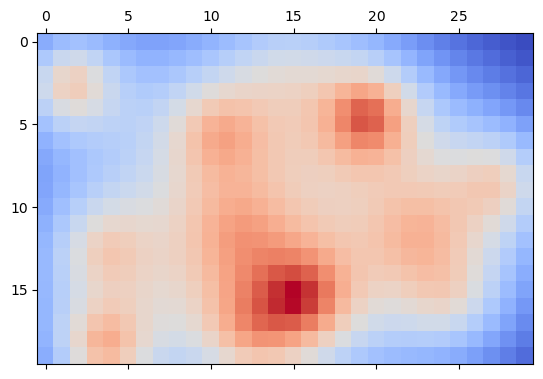

In [18]:
import numpy as np

# Estimate lamp coordinates from diagram
lamp_coords = np.array([
    [2., 3., 3.], [4., 19., 3.], [4., 13., 3.6], [11., 6., 3.5], [15., 2., 4.5], [20., 5., 2.8],
    [28., 9., 3.4], [12., 12., 4.], [23., 12., 4.], [16., 16., 3.], [25., 16., 3.8], [13., 18., 3.6]
])

#Insert lamp coordinates in the grid
parking = np.zeros(shape = (30, 20))
for x in lamp_coords:
    parking[int(x[0]), int(x[1])] = x[2]
    
n = np.linspace(0.0, 599.00, 600)
j = np.zeros(shape = (600, 2))

#Assigning the parking space grid j
for x in n:
    j[int(x)] = np.array([x%30, int(x/30)])


def d_ij(i, j):
    distance = np.sqrt(abs(i[0] - (j[0] + 0.5))**2 + abs(i[1] - (j[1] + 0.5 ))**2 )**2 + i[2]**2
    return distance

A = np.zeros(shape = (600, 12))

for k in n:
    for a in range(12):
        A[int(k), int(a)] = 1 / d_ij(lamp_coords[int(a)], j[int(k)])

#Set light strength for all lamps to 20
xi = np.ones((12,1))*20

light_map = np.zeros(shape = (30, 20))

lighting = A @ xi

for x in n:
    light_map[int(j[int(x)][0]), int(j[int(x)][1])] = lighting[int(x)]
    
fig, ax = plt.subplots()

im = ax.matshow(light_map.T, cmap='coolwarm')

<h3>(c)</h3>

<h3>(d)</h3>

<h3>(e)</h3>